In [173]:
import pandas as pd

In [174]:
#docs=pd.read_table('SMSSpamCollection+(1)', header=None,names=['class','sms'])
docs=pd.read_table('SMSSpamCollection+(1)', header=None,names=['Class','sms'])
# classifier in column 1 and sms in  column 2
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [175]:
#counting spam and ham instance
#df.column_name.value.counts()
ham_spam=docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [176]:
print('Spam % is ',(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  13.406317300789663


In [177]:
# mapping labels to 0 and 1
docs['label']=docs.Class.map({'ham':0,'spam':1})
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [178]:
X=docs.sms
Y=docs.label
print(X.shape)
print(Y.shape)


(5572,)
(5572,)


In [179]:
# splitting into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train ,Y_test=train_test_split(X,Y,random_state=1)
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [180]:
# vectorizing the  sentences ; removing stop words
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer()
vect.fit(X_train)
#X_train_dtm=vect.transform(X_train)

CountVectorizer()

In [181]:
# printing the vocabulary 
vect.vocabulary_

{'4mths': 509,
 'half': 3181,
 'price': 5193,
 'orange': 4781,
 'line': 3971,
 'rental': 5479,
 'latest': 3880,
 'camera': 1572,
 'phones': 4987,
 'free': 2864,
 'had': 3170,
 'your': 7424,
 'phone': 4983,
 '11mths': 264,
 'call': 1552,
 'mobilesdirect': 4375,
 'on': 4743,
 '08000938767': 50,
 'to': 6656,
 'update': 6892,
 'now': 4662,
 'or2stoptxt': 4779,
 'cs': 2022,
 'did': 2222,
 'you': 7420,
 'stitch': 6218,
 'his': 3316,
 'trouser': 6758,
 'hope': 3362,
 'enjoyed': 2502,
 'new': 4580,
 'content': 1916,
 'text': 6514,
 'stop': 6228,
 '61610': 563,
 'unsubscribe': 6882,
 'help': 3276,
 '08712400602450p': 98,
 'provided': 5255,
 'by': 1538,
 'tones2you': 6683,
 'co': 1810,
 'uk': 6829,
 'not': 4647,
 'heard': 3255,
 'from': 2899,
 'u4': 6823,
 'while': 7199,
 'rude': 5612,
 'chat': 1691,
 'private': 5206,
 '01223585334': 5,
 'cum': 2040,
 'wan': 7075,
 '2c': 374,
 'pics': 5002,
 'of': 4704,
 'me': 4238,
 'gettin': 3002,
 'shagged': 5804,
 'then': 6552,
 'pix': 5023,
 '8552': 660,
 '

In [182]:
# transforming the  train and test datasets 
X_train_transformed =vect.transform(X_train)
X_test_transformed=vect.transform(X_test)

In [183]:
# Note that is type is transformed matrix 
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1552)	1
  (0, 1572)	1
  (0, 2022)	1
  (0, 2864)	2
  (0, 3170)	1
  (0, 3181)	1
  (0, 3880)	1
  (0, 3971)	1
  (0, 4375)	1
  (0, 4662)	1
  (0, 4743)	1
  (0, 4779)	1
  (0, 4781)	1
  (0, 4983)	1
  (0, 4987)	1
  (0, 5193)	1
  (0, 5479)	1
  (0, 6656)	1
  (0, 6892)	1
  (0, 7424)	1
  (1, 2222)	1
  (1, 3316)	1
  :	:
  (4177, 2744)	1
  (4177, 2786)	1
  (4177, 3629)	1
  (4177, 3700)	1
  (4177, 3738)	1
  (4177, 4255)	1
  (4177, 4446)	1
  (4177, 4508)	1
  (4177, 4778)	1
  (4177, 4934)	1
  (4177, 5403)	1
  (4177, 5490)	1
  (4177, 5656)	1
  (4177, 5796)	1
  (4177, 6034)	1
  (4177, 6514)	1
  (4177, 6577)	1
  (4177, 6656)	1
  (4177, 6662)	1
  (4177, 6887)	1
  (4177, 7257)	1
  (4178, 1691)	1
  (4178, 4238)	1
  (4178, 5999)	1
  (4178, 7257)	1


In [184]:
# training the NB model and Making a prediction 
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
# fit
mnb.fit(X_train_transformed,Y_train)

# Predication class

Y_pred_class=mnb.predict(X_test_transformed)

# predict the probabilities
Y_pred_proba=mnb.predict_proba(X_test_transformed)

# print the overall accuracy 
from sklearn import metrics
metrics.accuracy_score(Y_test,Y_pred_class)

0.9885139985642498

In [185]:
Y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [186]:
# Note that alpha=1 is used by default for smoothing
mnb

MultinomialNB()

In [187]:
# confusion matrix
metrics.confusion_matrix(Y_test,Y_pred_class)

array([[1203,    5],
       [  11,  174]], dtype=int64)

In [188]:
confusion=metrics.confusion_matrix(Y_test,Y_pred_class)
print(confusion)
# [row and column]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

[[1203    5]
 [  11  174]]


In [189]:
sensitivity=TP/float(FN+TP)
print('sensitivity',sensitivity)

sensitivity 0.9405405405405406


In [190]:
specificity=TN/float(TN+FP)
print('specificity',specificity)

specificity 0.9958609271523179


In [191]:
precision=TP/float(TP+FP)
print("precision",precision)
print(metrics.precision_score(Y_test,Y_pred_class))


precision 0.9720670391061452
0.9720670391061452


In [192]:
print('PRECISION : ',precision)
print('PRECISION SCORE : ',metrics.precision_score(Y_test,Y_pred_class))
print('RECALL SCORE : ',metrics.recall_score(Y_test,Y_pred_class))
print('F1 SCORE : ',metrics.f1_score(Y_test,Y_pred_class))

PRECISION :  0.9720670391061452
PRECISION SCORE :  0.9720670391061452
RECALL SCORE :  0.9405405405405406
F1 SCORE :  0.9560439560439562


In [193]:
Y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [194]:
Y_pred_proba

array([[9.97122551e-01, 2.87744864e-03],
       [9.99981651e-01, 1.83488846e-05],
       [9.97926987e-01, 2.07301295e-03],
       ...,
       [9.99998910e-01, 1.09026171e-06],
       [1.86697467e-10, 1.00000000e+00],
       [9.99999996e-01, 3.98279868e-09]])

In [205]:
# Creating a ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot  as plt
false_postive_rate,true_positive_rate,threshold=roc_curve(Y_test,Y_pred_proba[:,1])
roc_auc=auc(fasle_postive_rate,true_positive_rate)

In [206]:
# area under the curve
print(roc_auc)

0.9866431000536962


In [207]:
print(false_postive_rate)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00165563 0.00248344 0.00248344
 0.00413907 0.00413907 0.01241722 0.01490066 0.0455298  0.04801325
 0.06374172 0.06374172 0.07284768 0.07284768 0.07698675 0.07698675
 0.08360927 0.08609272 0.0968543  0.09850993 0.12417219 0.12417219
 0.16887417 0.1705298  0.18046358 0.18294702 0.18874172 0.18874172
 0.19039735 0.19039735 0.22019868 0.2218543  0.22268212 0.22433775
 0.25413907 0.25662252 0.28145695 0.28311258 0.31705298 0.32533113
 0.36175497 0.36175497 0.37334437 0.37334437 0.3865894  0.38824503
 0.44039735 0.44205298 0.45612583 0.45612583 0.54718543 0.54718543
 0.54884106 0.55049669 0.66804636 0.66970199 0.78476821 0.78642384
 0.87665563 0.87831126 0.88245033 0.88410596 0.89983444 0.90149007
 0.90480132 0.90728477 0.94619205 0.94784768 0.9718543  0.97350993
 1.        ]


In [208]:
print(true_positive_rate)

[0.         0.42702703 0.44864865 0.45945946 0.46486486 0.47567568
 0.58378378 0.59459459 0.62162162 0.63243243 0.6972973  0.70810811
 0.77297297 0.78378378 0.91891892 0.91891892 0.91891892 0.93513514
 0.93513514 0.94594595 0.94594595 0.94594595 0.94594595 0.94594595
 0.94594595 0.95135135 0.95135135 0.95675676 0.95675676 0.96216216
 0.96216216 0.96216216 0.96216216 0.96216216 0.96216216 0.96756757
 0.96756757 0.96756757 0.96756757 0.96756757 0.96756757 0.97297297
 0.97297297 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838
 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838 0.97837838
 0.97837838 0.98378378 0.98378378 0.98918919 0.98918919 0.98918919
 0.98918919 0.98918919 0.98918919 0.99459459 0.99459459 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


In [209]:
print(threshold)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99999999e-01 9.99999999e-01 9.99999956e-01 9.99999953e-01
 9.99998806e-01 9.99998123e-01 7.23600514e-01 6.97142164e-01
 6.48308780e-01 5.90147040e-01 5.52916904e-01 4.06946918e-01
 1.45943938e-01 1.34481933e-01 2.55808633e-02 2.49001351e-02
 1.61935665e-02 1.50616078e-02 1.30541204e-02 1.30462727e-02
 9.09449030e-03 8.98059641e-03 7.58611819e-03 7.34075114e-03
 4.90498246e-03 4.59704347e-03 2.61798358e-03 2.55425120e-03
 9.16992010e-04 8.77454289e-04 7.66553435e-04 7.64945558e-04
 6.83973284e-04 6.72298501e-04 6.67123628e-04 6.56947318e-04
 3.91667266e-04 3.90018379e-04 3.89790343e-04 3.85950057e-04
 2.06702994e-04 2.03242391e-04 1.40843208e-04 1.40701180e-04
 7.76926538e-05 7.70480835e-05 4.22677197e-05 4.19426003e-05
 3.84158042e-05 3.76057927e-05 2.76173336e-05 2.67746798e-05
 1.15584076e-05 1.13927753e-05 8.11832458e-06 7.82380728e-06
 1.15186223e-06 1.118409

In [210]:
# Matrix of threshold TPR and FPR
pd.DataFrame({'Thresholds': threshold,
              'TPR': true_positive_rate,
              'FPR': false_postive_rate})

,Thresholds,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.427027,0.000000
2,1.000000e+00,0.448649,0.000000
3,1.000000e+00,0.459459,0.000000
4,1.000000e+00,0.464865,0.000000
...,...,...,...
80,1.151641e-16,1.000000,0.946192
81,8.836966e-17,1.000000,0.947848
82,9.709655e-20,1.000000,0.971854
83,6.675132e-20,1.000000,0.973510


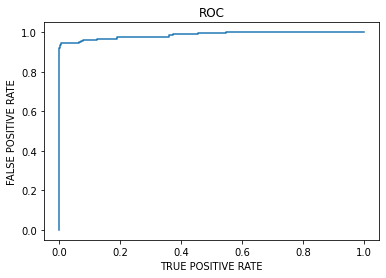

In [211]:
# Plotting the ROC curve 

%matplotlib inline
plt.ylabel("FALSE POSITIVE RATE")
plt.xlabel("TRUE POSITIVE RATE")
plt.title("ROC")
plt.plot(false_postive_rate,true_positive_rate)

